<a href="https://colab.research.google.com/github/chieuanh2910/chill/blob/main/Capstone_Increase_Membership_Clara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns
from functools import reduce

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/MIS779/Customer.xlsx')
df1.to_csv('Customer.csv', index=None, header = True)

df2 = pd.read_excel('/content/drive/MyDrive/MIS779/Product1_Mod.xlsx')
df2.to_csv('Product1.csv', index=None, header = True)

df3 = pd.read_excel('/content/drive/MyDrive/MIS779/Product2_Mod.xlsx')
df3.to_csv('Product2.csv', index=None, header = True)

df4 = pd.read_excel('/content/drive/MyDrive/MIS779/Product3_Mod.xlsx')
df4.to_csv('Product3.csv', index=None, header = True)

**CONVERT TO CSV**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df1 = pd.read_csv('Customer.csv')
df2 = pd.read_csv('Product1.csv')
df3 = pd.read_csv('Product2.csv')
df4 = pd.read_csv('Product3.csv')

product= [df2, df3, df4]
df_product = pd.concat(product)
dataframe = [df1, df_product]

df= reduce(lambda  left,right: pd.merge(left,right,on=['CostID','Affluence_Level'],
                                              how='inner'), dataframe)
df['IsInitialCommitment'] = df['IsInitialCommitment'].astype(bool)
df['FulfilmentDate'] = pd.to_datetime(df['FulfilmentDate'])
df['FulfilmentEndedDate'] = pd.to_datetime(df['FulfilmentEndedDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333098 entries, 0 to 333097
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   CostID                                      333098 non-null  object        
 1   Affluence_Level                             323314 non-null  object        
 2   Tenure                                      333098 non-null  int64         
 3   Age                                         333098 non-null  int64         
 4   Gender                                      260988 non-null  object        
 5   State                                       330923 non-null  object        
 6   HasValidEmailAddress                        333098 non-null  bool          
 7   HasValidMobileNumber                        333098 non-null  bool          
 8   Number_Of_Inbound_Communication_In_24_MTH   333098 non-null  int64        

In [ ]:
df.isnull().sum()

CostID                                            0
Affluence_Level                                9784
Tenure                                            0
Age                                               0
Gender                                        72110
State                                          2175
HasValidEmailAddress                              0
HasValidMobileNumber                              0
Number_Of_Inbound_Communication_In_24_MTH         0
Number_Of_Inbound_Communication_In_60_MTH         0
Number_Of_Outbound_Communication_In_24_MTH        0
Number_Of_Outbound_Communication_In_60_MTH        0
Pathway_Arrears_In_24_MTH                         0
Pathway_Arrears_In_60_MTH                         0
Inter_Mailing_Preferances_Update                  0
Inter_Personal_Details_Update                     0
contract_ID                                    7199
IsInitialCommitment                               0
Product                                        7199
TotPaidR    

In [ ]:
df['Gender'].fillna('Others', inplace= True)

df.dropna(subset = ['Product','contract_ID','State','Affluence_Level'], inplace=True)

In [ ]:
df.isnull().sum()

CostID                                            0
Affluence_Level                                   0
Tenure                                            0
Age                                               0
Gender                                            0
State                                             0
HasValidEmailAddress                              0
HasValidMobileNumber                              0
Number_Of_Inbound_Communication_In_24_MTH         0
Number_Of_Inbound_Communication_In_60_MTH         0
Number_Of_Outbound_Communication_In_24_MTH        0
Number_Of_Outbound_Communication_In_60_MTH        0
Pathway_Arrears_In_24_MTH                         0
Pathway_Arrears_In_60_MTH                         0
Inter_Mailing_Preferances_Update                  0
Inter_Personal_Details_Update                     0
contract_ID                                       0
IsInitialCommitment                               0
Product                                           0
TotPaidR    

In [ ]:
df['Is_Member'] = df['Product'].apply(lambda x: 1 if 'Membership' in x else 0)


In [ ]:
print("Percentage of missing values in Fulfilment Ended Date: ", round((df['FulfilmentEndedDate'].isnull().sum())/(len(df['FulfilmentEndedDate']))*100,2))


Percentage of missing values in Fulfilment Ended Date:  4.05


In [ ]:
df['FulfilmentEndedDate'] = df['FulfilmentEndedDate'].fillna('2023-07-27') #Replace missing values with 27/07/2023 to calculate membership duration


In [ ]:
df.isnull().sum()

CostID                                        0
Affluence_Level                               0
Tenure                                        0
Age                                           0
Gender                                        0
State                                         0
HasValidEmailAddress                          0
HasValidMobileNumber                          0
Number_Of_Inbound_Communication_In_24_MTH     0
Number_Of_Inbound_Communication_In_60_MTH     0
Number_Of_Outbound_Communication_In_24_MTH    0
Number_Of_Outbound_Communication_In_60_MTH    0
Pathway_Arrears_In_24_MTH                     0
Pathway_Arrears_In_60_MTH                     0
Inter_Mailing_Preferances_Update              0
Inter_Personal_Details_Update                 0
contract_ID                                   0
IsInitialCommitment                           0
Product                                       0
TotPaidR                                      0
FulfilmentDate                          

In [ ]:
#Define function to calculate membership duration (months)
def calculate_Membership_Duration(row):
    if row['Product'] == 'Membership':
        duration_in_days = (row['FulfilmentEndedDate'] - row['FulfilmentDate']).total_seconds() / (60 * 60 * 24)
        return round(duration_in_days / 30.44, 2)
    else:
        return 0

df['MembershipDuration'] = df.apply(calculate_Membership_Duration, axis=1)

df['MembershipDuration'] = pd.to_numeric(df['MembershipDuration'], errors='coerce') #change output to numerical datatype

In [ ]:
#Changing fulfilment ended date to fulfilment date for non members where dates are not equal.
#fulfilment ended date ko replace kr diya fulfilment date se
df.loc[(df['FulfilmentDate'] != df['FulfilmentEndedDate']) & (df['Product'] != 'Membership'),'FulfilmentEndedDate'] = df['FulfilmentDate']

In [ ]:
(df['MembershipDuration'] < 0).sum() #How many negative value

81

In [ ]:
df = df[df['MembershipDuration'] >= 0] # Remove 81 negative values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314626 entries, 0 to 333097
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   CostID                                      314626 non-null  object        
 1   Affluence_Level                             314626 non-null  object        
 2   Tenure                                      314626 non-null  int64         
 3   Age                                         314626 non-null  int64         
 4   Gender                                      314626 non-null  object        
 5   State                                       314626 non-null  object        
 6   HasValidEmailAddress                        314626 non-null  bool          
 7   HasValidMobileNumber                        314626 non-null  bool          
 8   Number_Of_Inbound_Communication_In_24_MTH   314626 non-null  int64        

In [ ]:
#Define function to calculate membership revenue = duration * $77
def calculate_Membership_Revenue(row):
    if row['Product'] == 'Membership':
        revenue = row['MembershipDuration'] * 77
        return revenue
    else:
        return 0

df['MembershipRevenue'] = df.apply(calculate_Membership_Revenue, axis=1) #Create a new column to the df


In [ ]:
df.describe()

,Tenure,Age,Number_Of_Inbound_Communication_In_24_MTH,Number_Of_Inbound_Communication_In_60_MTH,Number_Of_Outbound_Communication_In_24_MTH,Number_Of_Outbound_Communication_In_60_MTH,Pathway_Arrears_In_24_MTH,Pathway_Arrears_In_60_MTH,Inter_Mailing_Preferances_Update,Inter_Personal_Details_Update,TotPaidR,Is_Member,MembershipDuration,MembershipRevenue
count,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000,314626.00000,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000
mean,18.109079,52.307359,11.417435,28.173762,63.814599,164.640561,0.218018,0.48769,0.112152,0.801971,47.441193,0.040283,1.326730,102.158187
std,9.774057,21.574779,8.624959,19.118916,28.843109,67.754568,0.728072,1.48464,0.354570,1.192074,172.670660,0.196622,7.140669,549.831548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,11.000000,44.000000,7.000000,19.000000,39.000000,112.000000,0.000000,0.00000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
50%,16.000000,56.000000,11.000000,26.000000,70.000000,177.000000,0.000000,0.00000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000
75%,24.000000,66.000000,15.000000,33.000000,85.000000,215.000000,0.000000,0.00000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000
max,49.000000,105.000000,149.000000,442.000000,166.000000,359.000000,22.000000,56.00000,6.000000,14.000000,7000.000000,1.000000,78.420000,6038.340000


**Create Revenue attribute**

In [ ]:
df['Revenue'] = df.apply(lambda row: row['MembershipRevenue'] if row['Product'] == 'Membership' else row['TotPaidR'], axis=1)

**Age transformation**

Text(0, 0.5, 'Count')

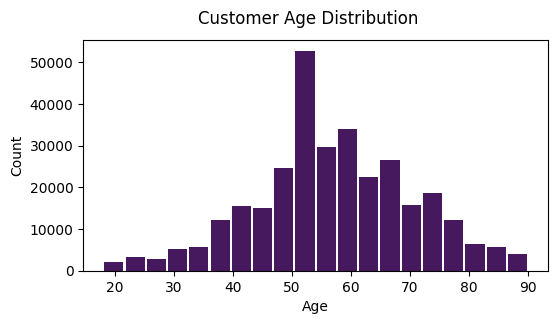

In [ ]:
average_value_age = df['Age'].mean()
df.loc[df['Age'] < 18, 'Age'] = average_value_age
df.loc[df['Age'] > 90, 'Age'] = average_value_age
plt.figure(figsize=(6, 3))
plt.hist(df['Age'], bins=20, rwidth=0.9, color ='#46185e')
plt.suptitle('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
# Group by 'CostID' and create a unique list of products for each customer
customer_products = df.groupby('CostID')['Product'].apply(frozenset).reset_index()

# Calculate the number of unique products used by each customer
customer_products['NumProducts'] = customer_products['Product'].apply(len)

# Rename the columns for clarity
customer_products.rename(columns={'Product': 'ProductBasket'}, inplace=True)


In [ ]:
df = df.merge(customer_products, on='CostID', how='inner')


In [ ]:
df = df.drop_duplicates(subset='CostID', keep='first')


In [ ]:
df.shape

(31408, 28)

In [ ]:
df['Is_Member'].value_counts()

0    26123
1     5285
Name: Is_Member, dtype: int64

**DESCRIPTIVE STATISTICS**

In [ ]:
#Create a new df only for Membership
df_membership = df.loc[df['Product'] == 'Membership']
#Statistics
sum_revenue = df_membership['MembershipRevenue'].sum()
min_revenue = df_membership['MembershipRevenue'].min()
max_revenue = df_membership['MembershipRevenue'].max()
mean_revenue = df_membership['MembershipRevenue'].mean()

print("Sum of Revenue:", sum_revenue)
print("Minimum Revenue:", min_revenue)
print("Maximum Revenue:", max_revenue)
print("Mean Revenue:", mean_revenue)

Sum of Revenue: 13016361.05
Minimum Revenue: 0.0
Maximum Revenue: 5959.8
Mean Revenue: 2462.8876158940398


In [ ]:
min_duration = df_membership['MembershipDuration'].min()
max_duration = df_membership['MembershipDuration'].max()
print("Minimum Duration:", min_duration)
print("Maximum Duration:", max_duration)

Minimum Duration: 0.0
Maximum Duration: 77.4


In [ ]:
df_filtered = df[df['Product'].isin(['Advert', 'Customized','Article', 'Detailed'])]

# Calculate the occurrence of products 'A' and 'B' and their respective sales counts
product_occurrence = df['Product'].value_counts()
sales_counts = df_filtered.groupby('Product')['TotPaidR'].sum()

print("Product Occurrence:")
print(product_occurrence)

print("\ Revenue:")
print(sales_counts)

Product Occurrence:
Detailed      12772
Article        5865
Customized     5482
Membership     5285
Advert         2004
Name: Product, dtype: int64
\ Revenue:
Product
Advert        1312113.0
Article        258152.0
Customized     104158.0
Detailed       114948.0
Name: TotPaidR, dtype: float64


Text(0, 0.5, 'Count')

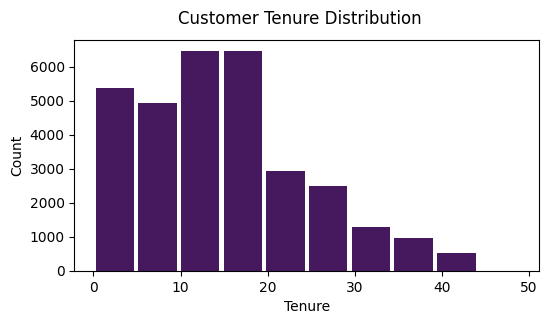

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(6, 3))
pyplot.hist(df['Tenure'], bins=10, rwidth=0.9, color ='#46185e')
pyplot.suptitle('Customer Tenure Distribution')
pyplot.xlabel('Tenure')
pyplot.ylabel('Count')

**ACTIVE MEMBERSHIP**

In [ ]:
df_membership['IsActiveMembership'] = df['FulfilmentEndedDate'] == '2023-07-27'
df_membership['IsActiveMembership'].value_counts()

<ipython-input-31-bce9bc668973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_membership['IsActiveMembership'] = df['FulfilmentEndedDate'] == '2023-07-27'


True     3787
False    1498
Name: IsActiveMembership, dtype: int64

In [ ]:
# Divide 'Customer Tenure' into four groups: <10, 10 - 20, 20 - 30, and >30
tenure_bins = [0, 10, 20, 30, float('inf')]
tenure_labels = ['<10', '10 - 20', '20 - 30', '>30']
df_membership['Customer Tenure Group'] = pd.cut(df_membership['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Map IsActiveMembership to 'Active' and 'Inactive'
df_membership['Membership Status'] = df_membership['IsActiveMembership'].map({True: 'Active', False: 'Inactive'})

# Calculate the count of 'Ad_package' (One-month, Three-month, Customized) for each 'Customer Tenure Group' and 'Membership Status'
grouped_counts = df_membership.groupby(['Customer Tenure Group', 'Membership Status']).size().unstack(fill_value=0)

# Create the bar graph with purple colormap
ax = grouped_counts.plot(kind='bar', stacked=True, colormap='Purples')

# Add labels and title
plt.xlabel('Customer Tenure Group (years)')
plt.ylabel('Count')
plt.title('Bar Graph: Customer Tenure vs. Membership Status')

# Set facecolor and layout
ax.set_facecolor('grey')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import plotly.express as px

# Separate data for active and inactive memberships
active_data = df_membership[df_membership['IsActiveMembership'] == True]
inactive_data = df_membership[df_membership['IsActiveMembership'] == False]

# Create histograms for MembershipDuration using Plotly Express
fig = px.histogram(df_membership, x='MembershipDuration', color='IsActiveMembership', nbins=20,
                   labels={'MembershipDuration': 'Membership Duration'},
                   category_orders={'IsActiveMembership': ['Active', 'Inactive']},
                   title='Histogram of Membership Duration by Membership Status')
fig.update_layout(
    autosize=False,
    width=800,  # Adjust width as needed
    height=600  # Adjust height as needed
)
fig.update_layout(barmode='overlay')  # Overlay bars to compare distributions

# Show the plot
fig.show()

In [ ]:
quartiles = np.percentile(df_membership['MembershipDuration'], [25, 50, 75])

# Display quartiles
print("1st Quartile (25th percentile):", quartiles[0])
print("2nd Quartile (Median, 50th percentile):", quartiles[1])
print("3rd Quartile (75th percentile):", quartiles[2])

1st Quartile (25th percentile): 21.02
2nd Quartile (Median, 50th percentile): 35.32
3rd Quartile (75th percentile): 40.11


<ipython-input-35-9c53ffe7e1e1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-9c53ffe7e1e1>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



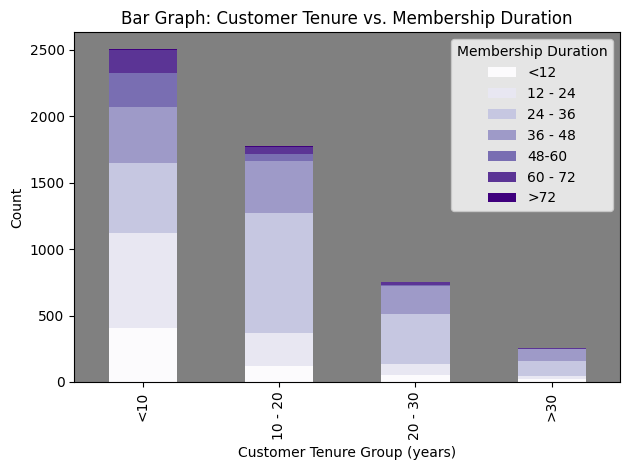

In [ ]:
tenure_bins = [0, 10, 20, 30, float('inf')]
tenure_labels = ['<10', '10 - 20', '20 - 30', '>30']
df_membership['Customer Tenure Group'] = pd.cut(df_membership['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

duration_bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
duration_labels = ['<12', '12 - 24', '24 - 36', '36 - 48', '48-60', '60 - 72', '>72']
df_membership['Membership Duration Group'] = pd.cut(df_membership['MembershipDuration'], bins=duration_bins, labels=duration_labels, right=False)

# # Calculate the count of 'Ad_package' (One-month, Three-month, Customized) for each 'Customer Tenure Group'
grouped_counts = df_membership.groupby(['Customer Tenure Group', 'Membership Duration Group']).size().unstack(fill_value=0)


# Create the bar graph with purple colormap
ax = grouped_counts.plot(kind='bar',stacked = True, colormap='Purples')

# Add labels and title
plt.xlabel('Customer Tenure Group (years)')
plt.ylabel('Count')
plt.title('Bar Graph: Customer Tenure vs. Membership Duration')

# Show the plot
ax.set_facecolor('grey')
plt.legend(title='Membership Duration', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Define custom colors
colors = ['#00CC96','#AB63FA']

# Group and aggregate data
grouped_data = df_membership.groupby(['Customer Tenure Group', 'IsActiveMembership'])['Revenue'].sum().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(grouped_data, x='Customer Tenure Group', y='Revenue', color='IsActiveMembership',
             labels={'Customer Tenure Group': 'Customer Tenure', 'Revenue': 'Total Revenue'},
             category_orders={'Customer Tenure Group': ['<1 Year', '1-3 Years', '3-5 Years', '>5 Years'], 'IsActiveMembership': [True, False]},
             title='Total Revenue of Active and Inactive Memberships by Customer Tenure',
             color_discrete_sequence=colors)  # Apply custom colors

# Resize the figure
fig.update_layout(
    autosize=False,
    width=800,  # Adjust width as needed
    height=700  # Adjust height as needed
)

# Set barmode to 'group' to prevent stacking
fig.update_layout(barmode='group')

# Create a table chart using go.Figure and add_trace
table_data = grouped_data.pivot(index='Customer Tenure Group', columns='IsActiveMembership', values='Revenue').reset_index()
fig.add_trace(go.Table(
    header=dict(values=['Customer Tenure Group', 'Active', 'Inactive']),
    cells=dict(values=[table_data['Customer Tenure Group'], table_data[True], table_data[False]])
))

# Show the plot
fig.show()

In [ ]:
print("Min Membership Duration: ", df_membership['MembershipDuration'].min())
print("Max Membership Duration: ", df_membership['MembershipDuration'].max())

Min Membership Duration:  0.0
Max Membership Duration:  77.4


<ipython-input-38-cf5cd03c3bb7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



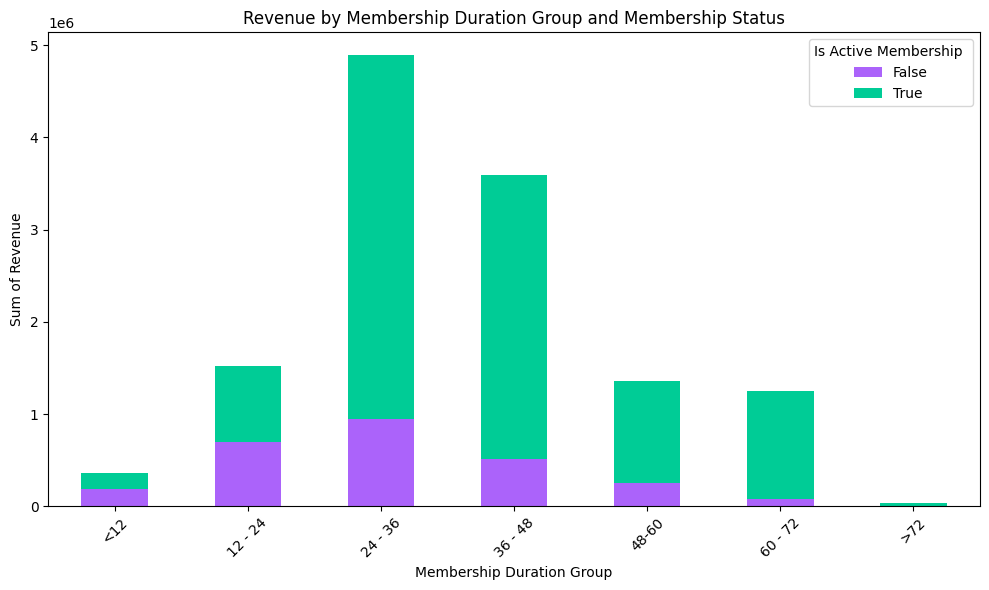

In [ ]:
duration_bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
duration_labels = ['<12', '12 - 24', '24 - 36', '36 - 48', '48-60', '60 - 72', '>72']
df_membership['Membership Duration Group'] = pd.cut(df_membership['MembershipDuration'], bins=duration_bins, labels=duration_labels, right=False)


# Group by 'Membership Duration Group' and 'IsActiveMembership', and sum the revenue
revenue_by_duration_status = df_membership.groupby(['Membership Duration Group', 'IsActiveMembership'])['Revenue'].sum().reset_index()

# Pivot the data to create a table suitable for plotting
pivot_table = revenue_by_duration_status.pivot(index='Membership Duration Group', columns='IsActiveMembership', values='Revenue')
pivot_table = pivot_table.reindex(duration_labels)  # Reorder rows based on duration labels

# Define colors for Membership Status
colors = ['#AB63FA', '#00CC96']

# Create a stacked bar chart with custom colors
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Sum of Revenue')
ax.set_xlabel('Membership Duration Group')
ax.set_title('Revenue by Membership Duration Group and Membership Status')
plt.xticks(rotation=45)
plt.legend(title='Is Active Membership ')

plt.tight_layout()
plt.show()

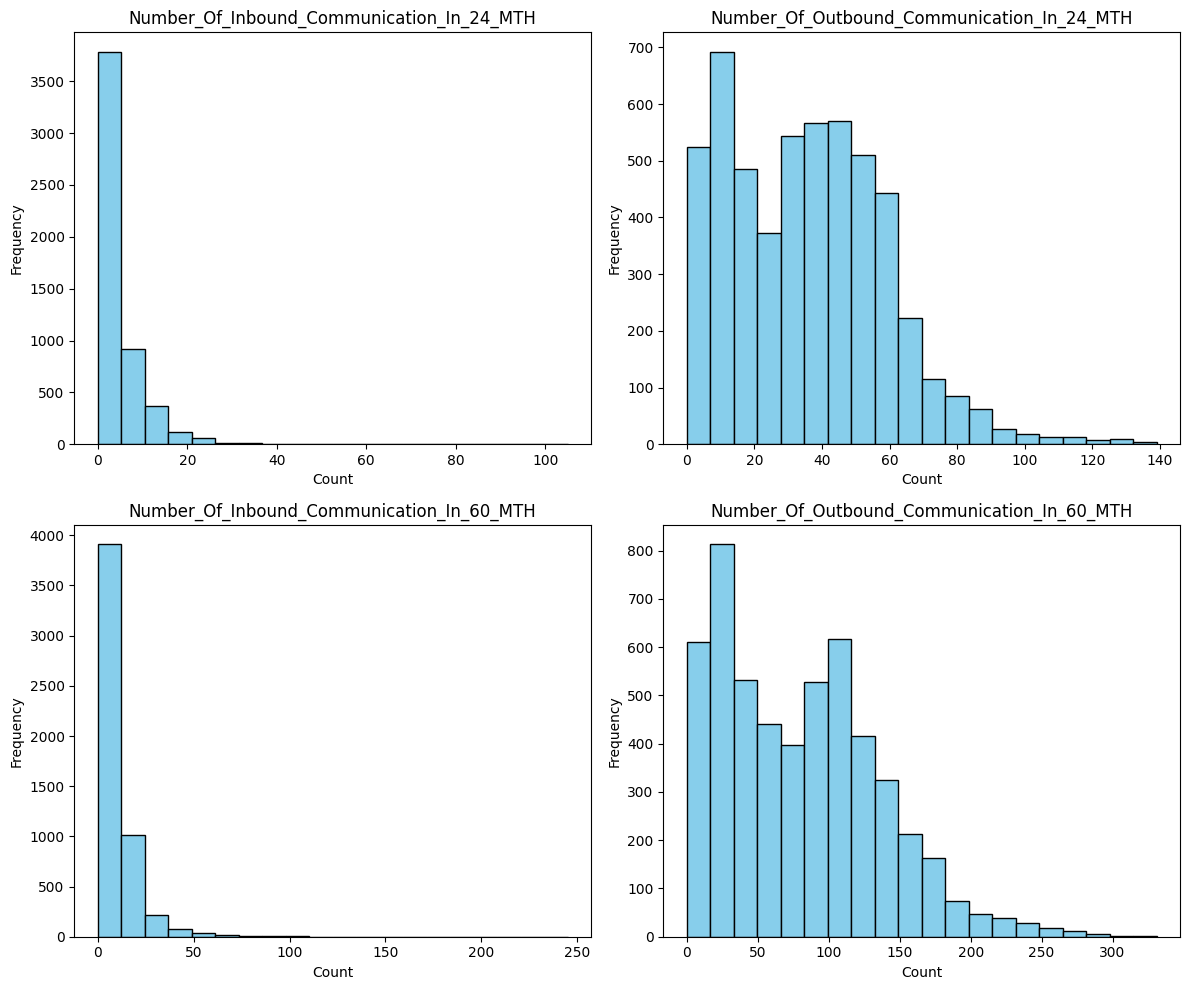

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the attributes
attributes = ['Number_Of_Inbound_Communication_In_24_MTH',
              'Number_Of_Outbound_Communication_In_24_MTH',
              'Number_Of_Inbound_Communication_In_60_MTH',
              'Number_Of_Outbound_Communication_In_60_MTH']

# Create histograms for each attribute
for i, attr in enumerate(attributes):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.hist(df_membership[attr], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(attr)
    ax.set_xlabel('Count')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the histograms
plt.show()

In [ ]:
# Create a box plot chart using Plotly Express
fig = px.box(df_membership, x='Gender', y='Revenue', title='Box Plot of Revenue by Gender of unique customer purchased [Customized, Detailed] basket')
fig.update_layout(
    width=900,   # Set the width of the chart
    height=500   # Set the height of the chart
)

# Show the plot
fig.show()

In [ ]:
# Create a grouped bar chart using Plotly Express
revenue_by_state_status = df_membership.groupby(['State', 'IsActiveMembership'])['Revenue'].sum().reset_index()

fig = px.bar(revenue_by_state_status, x='State', y='Revenue', color='IsActiveMembership',
             title='Revenue by State and Membership Status',
             color_discrete_map={True: '#00CC96' , False: '#AB63FA'})
sorted_states = revenue_by_state_status.groupby('State')['Revenue'].sum().sort_values(ascending=False).index
fig.update_xaxes(categoryorder='array', categoryarray=sorted_states)

fig.update_layout(
    width=800,   # Set the width of the chart
    height=500   # Set the height of the chart
)
# Show the plot
fig.show()


In [ ]:
import plotly.express as px

df_membership['Month-Year'] = df_membership['FulfilmentDate'].dt.to_period('M').dt.to_timestamp()

# Count unique Membership customers over time based on CostID
df_membership_time = df_membership.groupby('Month-Year', as_index=False)['CostID'].count()


# Create the line chart using Plotly Express for Membership and Advert
fig = px.line(df_membership_time, x='Month-Year', y = 'CostID' , markers=True,
              title='Total number of Membership over Time')

# Rename the y-axis label
fig.update_layout(yaxis_title='Count of CostID')

# Show the line chart
fig.show()

<ipython-input-47-268b0295a701>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Check data
df_membership_time.head()

,Month-Year,CostID
0,2017-01-01,1
1,2017-02-01,5
2,2017-03-01,3
3,2017-04-01,5
4,2017-05-01,8


In [ ]:
customer_products = df.groupby('CostID')['Product'].apply(frozenset).reset_index()

# Calculate the frequency of purchase based on CostID
frequency = df['CostID'].value_counts().reset_index()
frequency.columns = ['CostID', 'Frequency']

# Merge the frequency column with customer_products
customer_products = customer_products.merge(frequency, on='CostID', how='left')


In [ ]:
# Calculate the frequency of purchase and total revenue based on CostID
aggregated_data = df.groupby('CostID').agg({'Product': frozenset, 'Revenue': 'sum'}).reset_index()

# Merge the aggregated_data with customer_products
customer_products = customer_products.merge(aggregated_data, on=['CostID', 'Product'], how='left')


In [ ]:
# Filter customer_products for rows containing only the set {'Customized', 'Detailed'}
desired_set = {'Customized', 'Detailed'}
filtered_customer_products = customer_products[customer_products['Product'].apply(lambda x: set(x) == desired_set)]

In [ ]:
print("Min:", filtered_customer_products['Frequency'].min())
print("Mean:", filtered_customer_products['Frequency'].mean())
print("Max:", filtered_customer_products['Frequency'].max())

Min: 2
Mean: 13.215286425902864
Max: 47


In [ ]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(filtered_customer_products, title='Data Profile Report', explorative=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fcf03f915da811b6380f5866583d611d18a6d16612b57cc92389cde088e8b2f9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


<ipython-input-43-579cecb916b1>:2: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [ ]:
profile.to_file('data_profile_report.html')


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
filtered_customer_products['Revenue'].sum()

1070255.0

In [ ]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df_membership, title='Membership DF Profile Report', explorative=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=63399da5bc4bd30f5bc2be83f5dd64107b58d1d01e74d050676ac0197c523a6d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


<ipython-input-147-38d4c910f66b>:2: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [ ]:
profile.to_file('MembershipDF_profile_report.html')


/usr/local/lib/python3.10/dist-packages/multimethod/__init__.py:315: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Create a histogram using Plotly Express
fig = px.histogram(filtered_customer_products, x='Frequency', nbins=20, title='Histogram of Frequency',
                   color_discrete_sequence=['#46185e'])  # Add custom color

fig.update_layout(
    autosize=False,
    width=600,  # Set the width of the plot
    height=400,  # Set the height of the plot
    bargap=0.1
)

# Show the histogram
fig.show()

In [ ]:
filter_values = ['Detailed', 'Customized']
filtered_df = df[df['Product'].isin(filter_values)][['CostID', 'Product', 'FulfilmentDate']]

In [ ]:
purchasetime_df = filtered_df.merge(filtered_customer_products, on='CostID', how='inner')


In [ ]:
#Drop 'Product_x' column

purchasetime_df = purchasetime_df.drop(columns=['Product_x'])

# Rename 'Product_y' to 'ProductBasket'
purchasetime_df = purchasetime_df.rename(columns={'Product_y': 'ProductBasket'})


In [ ]:
# purchasetime_df['FulfilmentDate_Min'] = purchasetime_df.groupby('CostID')['FulfilmentDate'].transform('min')
# purchasetime_df['FulfilmentDate_Max'] = purchasetime_df.groupby('CostID')['FulfilmentDate'].transform('max')

In [ ]:
purchasetime_df['FulfilmentDate'] = pd.to_datetime(purchasetime_df['FulfilmentDate'])

# Sort the DataFrame by CostID and FulfilmentDate
purchasetime_df = purchasetime_df.sort_values(by=['CostID', 'FulfilmentDate'])

# Calculate the recency between each purchase for the same CostID
purchasetime_df['Recency'] = purchasetime_df.groupby('CostID')['FulfilmentDate'].diff().dt.days

In [ ]:
purchasetime_df

,CostID,FulfilmentDate,ProductBasket,Frequency,Revenue,Recency
35603,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2018-02-02,"(Detailed, Customized)",5,65.0,NaN
35604,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2018-10-17,"(Detailed, Customized)",5,65.0,257.0
35606,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2018-10-17,"(Detailed, Customized)",5,65.0,0.0
35602,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2020-11-03,"(Detailed, Customized)",5,65.0,748.0
35605,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2020-11-03,"(Detailed, Customized)",5,65.0,0.0
...,...,...,...,...,...,...
19480,{FFF33934-A2C2-4B16-B7DD-45F5596A6A02},2021-09-24,"(Detailed, Customized)",17,203.0,245.0
19484,{FFF33934-A2C2-4B16-B7DD-45F5596A6A02},2021-11-06,"(Detailed, Customized)",17,203.0,43.0
19491,{FFF33934-A2C2-4B16-B7DD-45F5596A6A02},2022-01-13,"(Detailed, Customized)",17,203.0,68.0
19493,{FFF33934-A2C2-4B16-B7DD-45F5596A6A02},2022-01-13,"(Detailed, Customized)",17,203.0,0.0


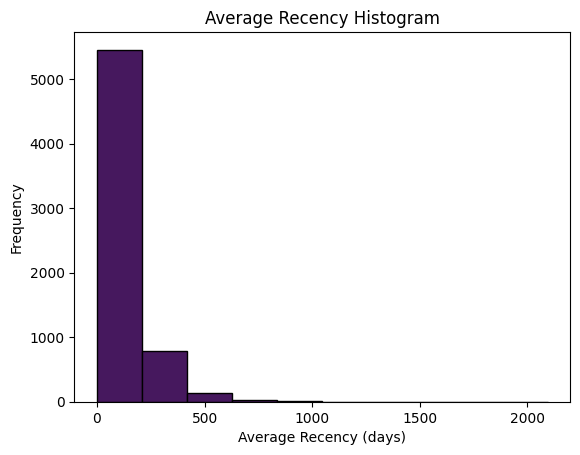

In [ ]:
# Calculate the average recency for each CostID
average_recency = purchasetime_df.groupby('CostID')['Recency'].mean()

# Create a histogram for average recency
plt.hist(average_recency, bins=10, edgecolor='black', color ='#46185e')
plt.title('Average Recency Histogram')
plt.xlabel('Average Recency (days)')
plt.ylabel('Frequency')
plt.show()

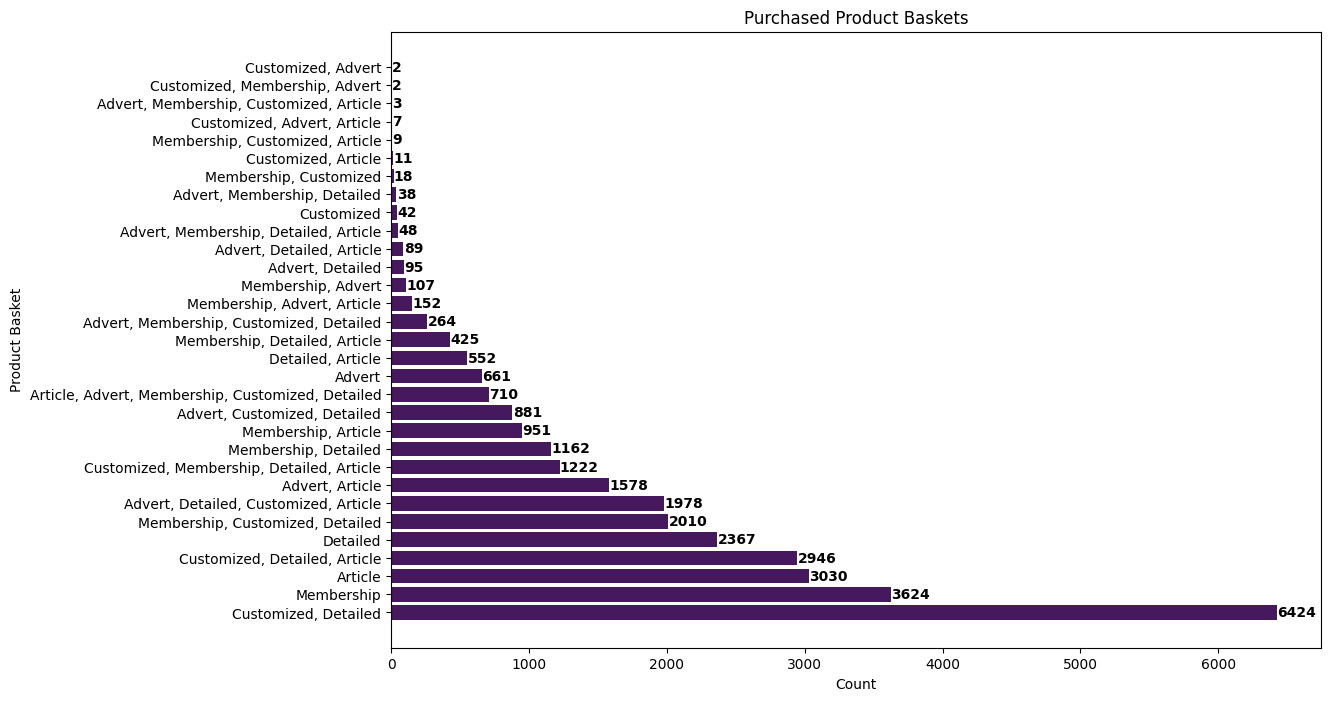

In [ ]:
#Group by 'CostID' and create a unique list of products for each customer
customer_products = df.groupby('CostID')['Product'].apply(frozenset).reset_index()

# Count the occurrences of each unique 'ProductBasket'
product_basket_counts = customer_products['Product'].value_counts().reset_index()
product_basket_counts.columns = ['ProductBasket', 'Count']

# Convert frozensets to strings
product_basket_counts['ProductBasket'] = product_basket_counts['ProductBasket'].apply(lambda x: ', '.join(x))

# Set the figure size for the horizontal bar chart
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
ax = plt.barh(product_basket_counts['ProductBasket'], product_basket_counts['Count'], color='#46185e')

# Show the values on top of the bars
for bar in ax.patches:
    width = bar.get_width()
    plt.text(width + 3, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center', color='black', fontweight='bold')

# Set x-axis label
plt.xlabel("Count")

# Set y-axis label
plt.ylabel("Product Basket")

# Set plot title
plt.title("Purchased Product Baskets")

# Show the plot
plt.show()


#MODEL TRAINING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31408 entries, 0 to 314617
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CostID                                      31408 non-null  object        
 1   Affluence_Level                             31408 non-null  object        
 2   Tenure                                      31408 non-null  int64         
 3   Age                                         31408 non-null  float64       
 4   Gender                                      31408 non-null  object        
 5   State                                       31408 non-null  object        
 6   HasValidEmailAddress                        31408 non-null  bool          
 7   HasValidMobileNumber                        31408 non-null  bool          
 8   Number_Of_Inbound_Communication_In_24_MTH   31408 non-null  int64         
 9   Numbe

In [ ]:
df_new  = df.copy()

In [ ]:
df_new = df_new.drop(columns=['TotPaidR', 'MembershipRevenue', 'contract_ID', 'FulfilmentDate', 'FulfilmentEndedDate'])


<ipython-input-47-5f20f5e28c02>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



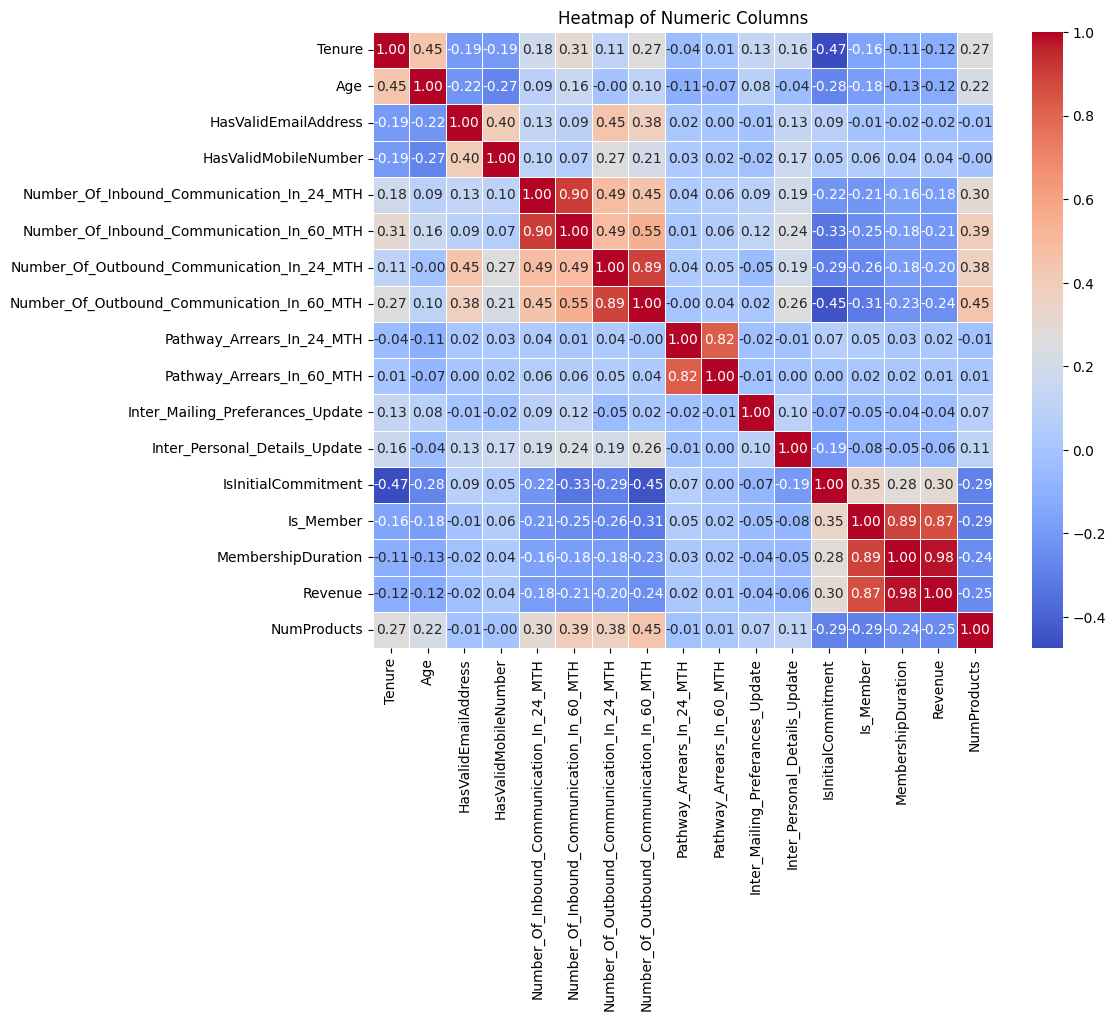

In [ ]:
# Create a heatmap for the numeric columns
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Numeric Columns')
plt.show()

In [ ]:
df_new = df_new.drop(columns=['Number_Of_Inbound_Communication_In_24_MTH', 'Number_Of_Outbound_Communication_In_24_MTH', 'Pathway_Arrears_In_24_MTH', 'MembershipDuration', 'ProductBasket','Product','Revenue'])


In [ ]:
df_new['Is_Member']. value_counts()

0    26123
1     5285
Name: Is_Member, dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31408 entries, 0 to 314617
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CostID                                      31408 non-null  object 
 1   Affluence_Level                             31408 non-null  object 
 2   Tenure                                      31408 non-null  int64  
 3   Age                                         31408 non-null  float64
 4   Gender                                      31408 non-null  object 
 5   State                                       31408 non-null  object 
 6   HasValidEmailAddress                        31408 non-null  bool   
 7   HasValidMobileNumber                        31408 non-null  bool   
 8   Number_Of_Inbound_Communication_In_60_MTH   31408 non-null  int64  
 9   Number_Of_Outbound_Communication_In_60_MTH  31408 non-null  int64  
 10  Pathway_A

In [ ]:
numeric_columns = ['Tenure', 'Age', 'Number_Of_Inbound_Communication_In_60_MTH', 'Number_Of_Outbound_Communication_In_60_MTH', 'Pathway_Arrears_In_60_MTH',
                   'Inter_Mailing_Preferances_Update', 'Inter_Personal_Details_Update', 'NumProducts']
categorical_columns = ['Affluence_Level', 'Gender','State','HasValidEmailAddress','HasValidMobileNumber','IsInitialCommitment']

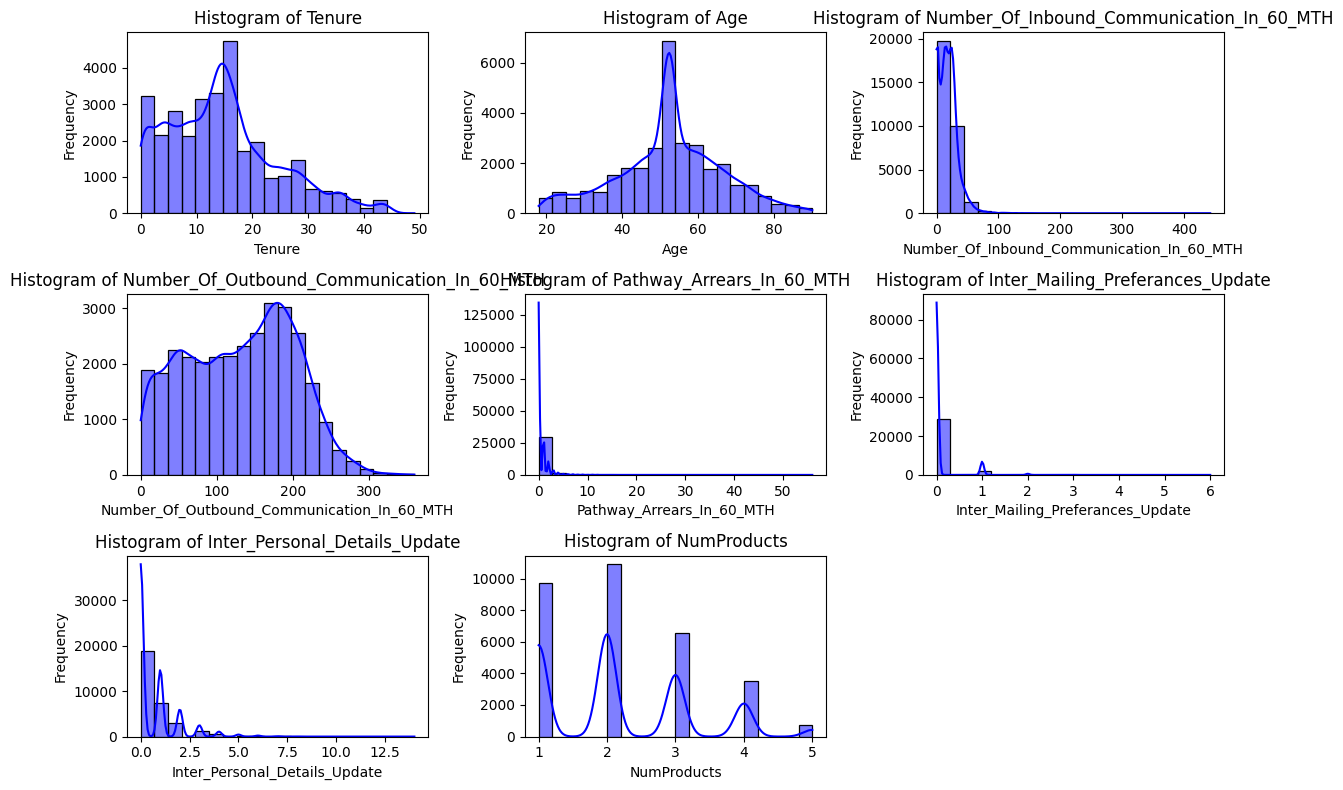

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your numeric columns
numeric_columns = ['Tenure', 'Age', 'Number_Of_Inbound_Communication_In_60_MTH', 'Number_Of_Outbound_Communication_In_60_MTH',
                   'Pathway_Arrears_In_60_MTH', 'Inter_Mailing_Preferances_Update', 'Inter_Personal_Details_Update',
                    'NumProducts']

# Set the number of bins for the histograms
num_bins = 20

# Create histograms for each numeric column
plt.figure(figsize=(12, 8))

for column in numeric_columns:
    plt.subplot(3, 3, numeric_columns.index(column) + 1)  # Create a subplot for each column
    sns.histplot(df_new[column], bins=num_bins, kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**TRANSFORMED_DF**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original DataFrame for transformation
transformed_df = df_new.copy()

# Initialize MinMaxScaler for numeric columns
scaler = MinMaxScaler()

# Scale numeric columns to the range [0, 1]
transformed_df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Apply one-hot encoding to categorical columns using pd.get_dummies
transformed_df = pd.get_dummies(transformed_df, columns=categorical_columns, drop_first=False)


In [ ]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31408 entries, 0 to 314617
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   CostID                                         31408 non-null  object 
 1   Tenure                                         31408 non-null  float64
 2   Age                                            31408 non-null  float64
 3   Number_Of_Inbound_Communication_In_60_MTH      31408 non-null  float64
 4   Number_Of_Outbound_Communication_In_60_MTH     31408 non-null  float64
 5   Pathway_Arrears_In_60_MTH                      31408 non-null  float64
 6   Inter_Mailing_Preferances_Update               31408 non-null  float64
 7   Inter_Personal_Details_Update                  31408 non-null  float64
 8   Is_Member                                      31408 non-null  int64  
 9   NumProducts                                    31

In [ ]:
transformed_df.describe()

,Tenure,Age,Number_Of_Inbound_Communication_In_60_MTH,Number_Of_Outbound_Communication_In_60_MTH,Pathway_Arrears_In_60_MTH,Inter_Mailing_Preferances_Update,Inter_Personal_Details_Update,Is_Member,NumProducts,Affluence_Level_Average income Average assets,Affluence_Level_Average income Low assets,Affluence_Level_High income High assets,Affluence_Level_High income Low assets,Affluence_Level_Highest income and assets,Affluence_Level_Low income High assets,Affluence_Level_Low income Low assets,Affluence_Level_Unknown,Gender_Female,Gender_Male,Gender_Others,State_ACT,State_NSW,State_QLD,State_SA,State_TAS,State_VIC,State_WA,HasValidEmailAddress_False,HasValidEmailAddress_True,HasValidMobileNumber_False,HasValidMobileNumber_True,IsInitialCommitment_False,IsInitialCommitment_True
count,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000,31408.000000
mean,0.299770,0.479333,0.043307,0.362218,0.009769,0.014259,0.048984,0.168269,0.297719,0.125127,0.062404,0.204693,0.083355,0.135539,0.156521,0.072752,0.159609,0.441798,0.259329,0.298873,0.026012,0.336316,0.157667,0.080139,0.020441,0.275726,0.103700,0.118823,0.881177,0.202337,0.797663,0.885793,0.114207
std,0.199988,0.193073,0.035578,0.197492,0.026686,0.051640,0.078924,0.374111,0.266123,0.330869,0.241893,0.403484,0.276422,0.342304,0.363354,0.259733,0.366249,0.496609,0.438273,0.457771,0.159175,0.472456,0.364434,0.271512,0.141504,0.446886,0.304875,0.323586,0.323586,0.401749,0.401749,0.318067,0.318067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.375000,0.018100,0.192201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,0.285714,0.476491,0.040724,0.378830,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,0.408163,0.597222,0.061086,0.518106,0.017857,0.000000,0.071429,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-56-5ae45d5bcfcc>:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



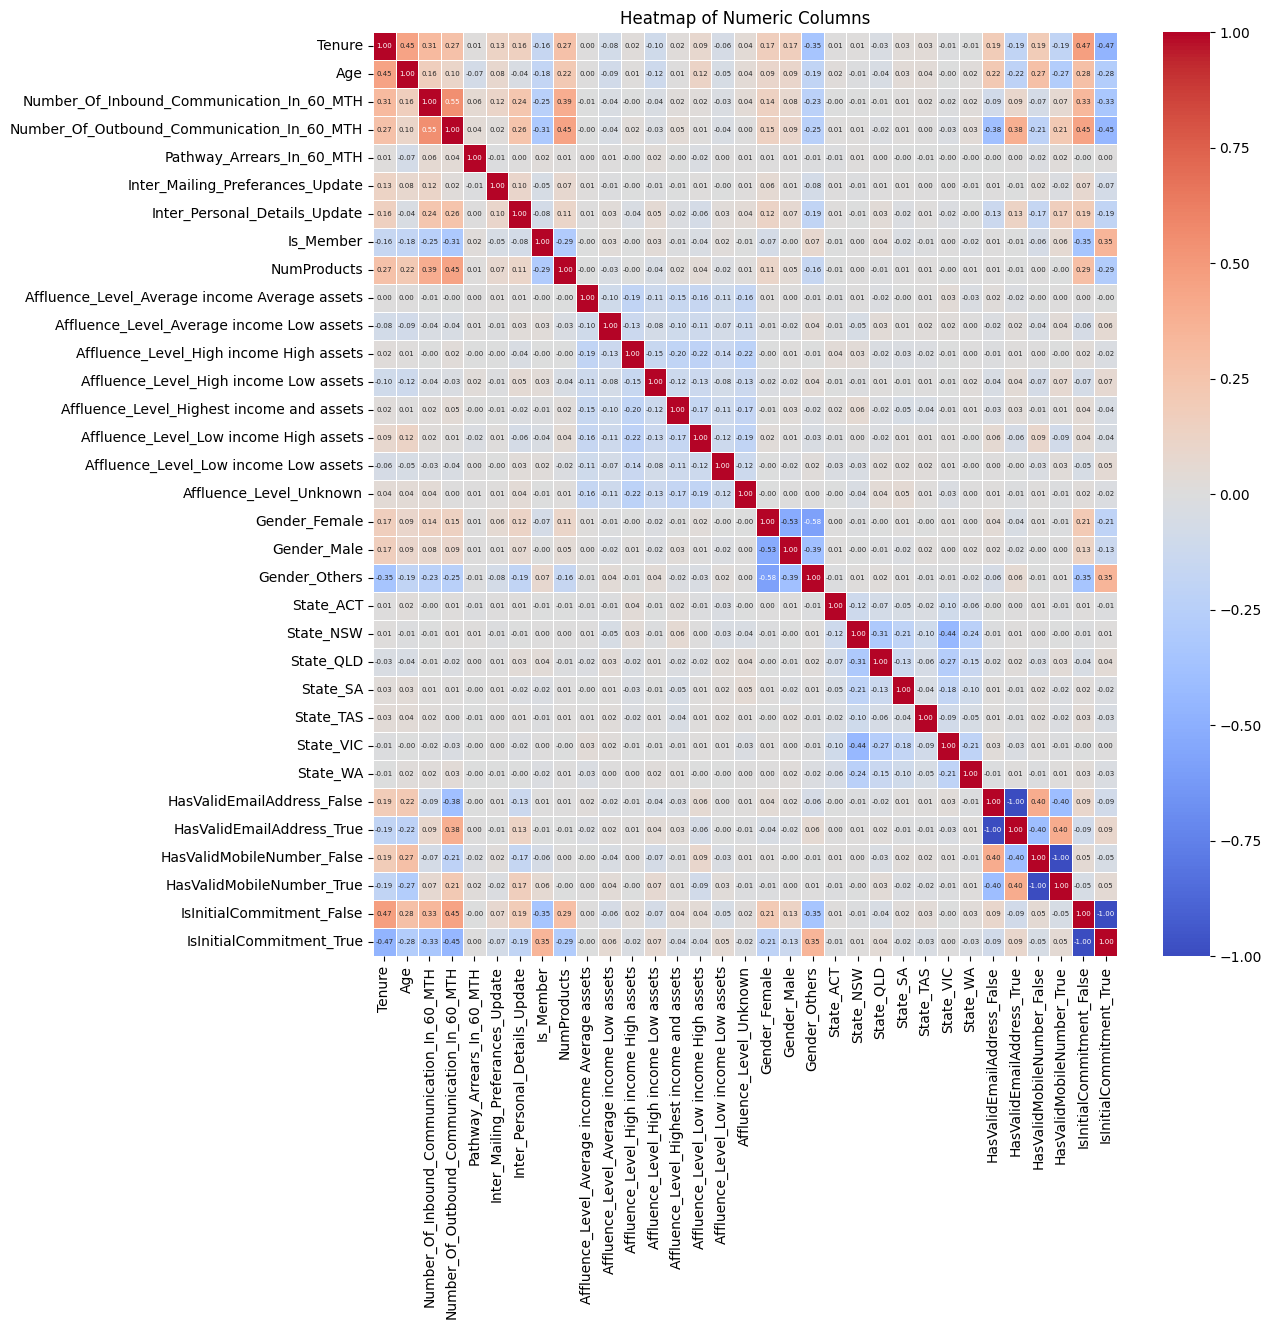

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the numeric columns
plt.figure(figsize=(12, 12))  # Adjust the figure size if needed

# Define custom annotation keyword arguments
annot_kws = {"fontsize": 5}  # Change the font size to 8 (or any other desired size)

sns.heatmap(transformed_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws=annot_kws)

plt.title('Heatmap of Numeric Columns')
plt.show()


In [ ]:
from sklearn.utils import shuffle

# Shuffle transformed_df
shuffled_df = shuffle(transformed_df)

In [ ]:
shuffled_df.shape

(31408, 34)

In [ ]:
shuffled_df.drop(columns=['CostID'])

**Split dataset to 2 samples: Sample 2 used for training and testing, Sample 1 used for Validation the propensity score**

In [ ]:
# Sample 1: 10000 records non member
sample_1 = shuffled_df[shuffled_df['Is_Member'] == 0].sample(n=10000, random_state=42)


# Sample 2: The remaining
sample_2 = shuffled_df.drop(sample_1.index)

# Reset index for both samples
sample_1.reset_index(drop=True, inplace=True)
sample_2.reset_index(drop=True, inplace=True)

In [ ]:
print("Sample 1 shape: ", sample_1.shape)
print("Sample 2 shape: ", sample_2.shape)


Sample 1 shape:  (10000, 34)
Sample 2 shape:  (21408, 34)


In [ ]:
sample_2.head()

,CostID,Tenure,Age,Number_Of_Inbound_Communication_In_60_MTH,Number_Of_Outbound_Communication_In_60_MTH,Pathway_Arrears_In_60_MTH,Inter_Mailing_Preferances_Update,Inter_Personal_Details_Update,Is_Member,NumProducts,Affluence_Level_Average income Average assets,Affluence_Level_Average income Low assets,Affluence_Level_High income High assets,Affluence_Level_High income Low assets,Affluence_Level_Highest income and assets,Affluence_Level_Low income High assets,Affluence_Level_Low income Low assets,Affluence_Level_Unknown,Gender_Female,Gender_Male,Gender_Others,State_ACT,State_NSW,State_QLD,State_SA,State_TAS,State_VIC,State_WA,HasValidEmailAddress_False,HasValidEmailAddress_True,HasValidMobileNumber_False,HasValidMobileNumber_True,IsInitialCommitment_False,IsInitialCommitment_True
0,{89F430ED-75F1-4E4A-8A75-406ADC26DADB},0.040816,0.319444,0.029412,0.247911,0.017857,0.0,0.071429,0,0.50,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,{509F58E1-DEFD-499A-8B8D-A24807739E43},0.183673,0.347222,0.027149,0.537604,0.000000,0.0,0.000000,0,0.50,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,{52A99CB1-9BBE-4A0F-8791-4E1713ED1341},0.346939,0.476491,0.002262,0.518106,0.000000,0.0,0.000000,0,0.00,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
3,{907682E3-0F4C-4C8F-8707-EE1BBD24A0EA},0.102041,0.083333,0.047511,0.442897,0.035714,0.0,0.000000,0,0.25,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0
4,{99F29B53-EA51-4A55-85EE-F3712A205293},0.244898,0.472222,0.040724,0.247911,0.000000,0.0,0.000000,0,0.50,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


In [ ]:
sample_1['Is_Member'].value_counts()

0    10000
Name: Is_Member, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score



In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = sample_2.drop(['CostID','Is_Member'], axis=1)  # Features
y = sample_2['Is_Member']  # Target variable


In [ ]:
#Checking VIF to remove predictors with VIF greater than 5

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant term (intercept) to the data
data_with_constant = add_constant(X)
numeric_data = data_with_constant.select_dtypes(include=[np.number])

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Feature"] = numeric_data.columns
vif["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in double_scalars



                                          Feature           VIF
0                                           const  0.000000e+00
1                                          Tenure  1.760549e+00
2                                             Age  1.424708e+00
3       Number_Of_Inbound_Communication_In_60_MTH  1.595261e+00
4      Number_Of_Outbound_Communication_In_60_MTH  2.419922e+00
5                       Pathway_Arrears_In_60_MTH  1.015636e+00
6                Inter_Mailing_Preferances_Update  1.040067e+00
7                   Inter_Personal_Details_Update  1.183016e+00
8                                     NumProducts  1.410338e+00
9   Affluence_Level_Average income Average assets  4.582403e+08
10      Affluence_Level_Average income Low assets  7.481187e+10
11        Affluence_Level_High income High assets  6.899195e+08
12         Affluence_Level_High income Low assets  2.230723e+06
13      Affluence_Level_Highest income and assets  3.740702e+09
14         Affluence_Level_Low income Hi

In [ ]:
X.head()

,Tenure,Age,Number_Of_Inbound_Communication_In_60_MTH,Number_Of_Outbound_Communication_In_60_MTH,Pathway_Arrears_In_60_MTH,Inter_Mailing_Preferances_Update,Inter_Personal_Details_Update,NumProducts,Affluence_Level_Average income Average assets,Affluence_Level_Average income Low assets,Affluence_Level_High income High assets,Affluence_Level_High income Low assets,Affluence_Level_Highest income and assets,Affluence_Level_Low income High assets,Affluence_Level_Low income Low assets,Affluence_Level_Unknown,Gender_Female,Gender_Male,Gender_Others,State_ACT,State_NSW,State_QLD,State_SA,State_TAS,State_VIC,State_WA,HasValidEmailAddress_False,HasValidEmailAddress_True,HasValidMobileNumber_False,HasValidMobileNumber_True,IsInitialCommitment_False,IsInitialCommitment_True
0,0.040816,0.319444,0.029412,0.247911,0.017857,0.0,0.071429,0.50,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,0.183673,0.347222,0.027149,0.537604,0.000000,0.0,0.000000,0.50,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0.346939,0.476491,0.002262,0.518106,0.000000,0.0,0.000000,0.00,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
3,0.102041,0.083333,0.047511,0.442897,0.035714,0.0,0.000000,0.25,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0
4,0.244898,0.472222,0.040724,0.247911,0.000000,0.0,0.000000,0.50,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


In [ ]:
y.value_counts()

0    16123
1     5285
Name: Is_Member, dtype: int64

In [ ]:
# # Initialize the RandomOverSampler
# oversampler = RandomOverSampler(random_state=42)

# # Fit and transform the data to perform the oversampling
# X_resampled, y_resampled = oversampler.fit_resample(X, y)

# # Create a new DataFrame with the resampled data
# df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
# df_resampled['Product'] = y_resampled

# # Check the class distribution after upsampling
# print(df_resampled['Product'].value_counts())

In [ ]:

# # Split the resampled dataset into training (70%) and validation (30%) sets
# X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3,random_state=42)

# # Create and configure the Random Forest model
# random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the model to the training data
# random_forest_model.fit(X_train, y_train)

# # Make predictions on the validation data
# y_pred = random_forest_model.predict(X_valid)



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split your data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = random_forest.predict(X_valid)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_valid, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate Kappa
kappa = cohen_kappa_score(y_valid, y_pred)
print(f'Kappa: {kappa:.2f}')

# Calculate ROC AUC
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_valid, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate Recall
recall = recall_score(y_valid, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_valid, y_pred)
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.87
MAE: 0.13
Kappa: 0.66
ROC AUC: 0.82
Precision: 0.76
Recall: 0.72
F1 Score: 0.74


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_valid, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4845
           1       0.76      0.72      0.74      1578

    accuracy                           0.87      6423
   macro avg       0.83      0.82      0.83      6423
weighted avg       0.87      0.87      0.87      6423



Text(0.5, 1.0, 'Confusion Matrix')

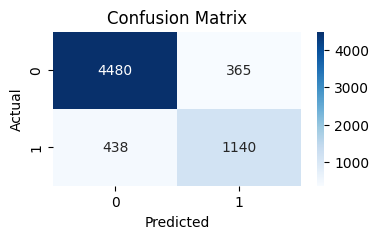

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
propensity_scores = random_forest.predict_proba(X_train_resampled)[:, 1]


In [ ]:
import numpy as np

# Assuming you have already calculated propensity_scores

# Use numpy.unique() to get unique values and their counts
unique_values, counts = np.unique(propensity_scores, return_counts=True)

# Create a dictionary to store the unique values and their counts
propensity_counts = dict(zip(unique_values, counts))
propensity_counts

{0.0: 3068,
 0.006666666666666666: 1,
 0.013333333333333332: 1,
 0.02: 2154,
 0.025: 1,
 0.02571428571428571: 1,
 0.03: 1,
 0.03333333333333333: 1,
 0.04: 1438,
 0.04666666666666667: 1,
 0.06: 1070,
 0.065: 2,
 0.08: 824,
 0.09: 1,
 0.09333333333333334: 1,
 0.1: 607,
 0.10666666666666666: 1,
 0.12: 464,
 0.14: 351,
 0.15: 1,
 0.16: 282,
 0.16333333333333333: 1,
 0.18: 203,
 0.2: 174,
 0.22: 133,
 0.24: 111,
 0.26: 77,
 0.28: 74,
 0.3: 38,
 0.32: 48,
 0.34: 34,
 0.36: 31,
 0.38: 23,
 0.4: 13,
 0.42: 12,
 0.44: 4,
 0.46: 5,
 0.48: 2,
 0.5: 1,
 0.5396666666666667: 2,
 0.54: 8,
 0.56: 9,
 0.5702380952380952: 2,
 0.575: 2,
 0.58: 14,
 0.6: 17,
 0.62: 29,
 0.64: 30,
 0.66: 41,
 0.6733333333333335: 1,
 0.68: 58,
 0.7: 85,
 0.72: 92,
 0.74: 108,
 0.76: 149,
 0.78: 151,
 0.8: 165,
 0.8166666666666665: 1,
 0.82: 192,
 0.84: 259,
 0.8416666666666667: 1,
 0.86: 282,
 0.88: 359,
 0.885: 1,
 0.9: 416,
 0.9066666666666667: 1,
 0.92: 579,
 0.94: 760,
 0.96: 1122,
 0.9666666666666666: 1,
 0.98: 1957,
 

In [ ]:
sample_2['Propensity_Score'] = random_forest.predict_proba(X)[:, 1]


<ipython-input-82-44463a32311c>:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-82-44463a32311c>:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




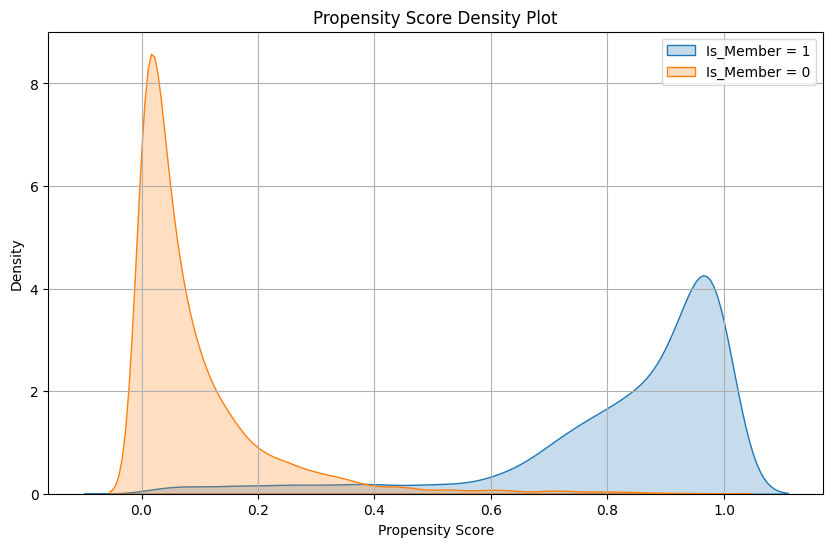

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate propensity scores for Is_Member = 0 and Is_Member = 1
ps_member = sample_2[sample_2['Is_Member'] == 1]['Propensity_Score']
ps_non_member = sample_2[sample_2['Is_Member'] == 0]['Propensity_Score']

# Create density plots for both groups
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Plot the density plot for Is_Member = 1
sns.kdeplot(ps_member, label='Is_Member = 1', shade=True)

# Plot the density plot for Is_Member = 0
sns.kdeplot(ps_non_member, label='Is_Member = 0', shade=True)

plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Density Plot')
plt.legend()
plt.grid(True)

# Show the density plots
plt.show()




<ipython-input-83-6400498340c7>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




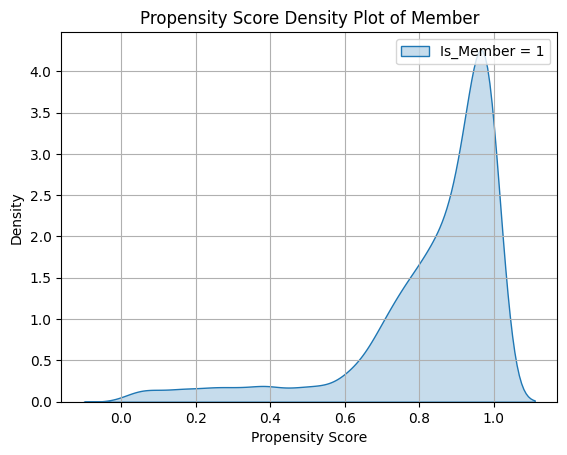

In [ ]:
# Plot the density plot for Is_Member = 1
sns.kdeplot(ps_member, label='Is_Member = 1', shade=True)


plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Density Plot of Member')
plt.legend()
plt.grid(True)

# Show the density plots
plt.show()

In [ ]:
# Define the bins for propensity score groups
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create labels for the groups
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

# Cut the 'Propensity_Score' column into bins and add the 'Group' column to sample_2
sample_2['Group'] = pd.cut(sample_2['Propensity_Score'], bins=bins, labels=labels)

# Group by 'Group' and 'Is_Member' columns and count the occurrences
grouped_counts = sample_2.groupby(['Group', 'Is_Member']).size().unstack(fill_value=0)

# Calculate the total count for each group
grouped_counts['Total'] = grouped_counts.sum(axis=1)

# Calculate the percentage of member and non-member for each group

grouped_counts['Member (%)'] = (grouped_counts[1] / grouped_counts['Total']) * 100
grouped_counts['Non-Member (%)'] = (grouped_counts[0] / grouped_counts['Total']) * 100

# Display the grouped counts and percentages
print(grouped_counts)

Is_Member      0     1  Total  Member (%)  Non-Member (%)
Group                                                    
0-0.2      12144   157  12301    1.276319       98.723681
0.2-0.4     1396   191   1587   12.035287       87.964713
0.4-0.6      312   199    511   38.943249       61.056751
0.6-0.8      173  1043   1216   85.773026       14.226974
0.8-1.0       67  3695   3762   98.219032        1.780968


In [ ]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   CostID                                         10000 non-null  object 
 1   Tenure                                         10000 non-null  float64
 2   Age                                            10000 non-null  float64
 3   Number_Of_Inbound_Communication_In_60_MTH      10000 non-null  float64
 4   Number_Of_Outbound_Communication_In_60_MTH     10000 non-null  float64
 5   Pathway_Arrears_In_60_MTH                      10000 non-null  float64
 6   Inter_Mailing_Preferances_Update               10000 non-null  float64
 7   Inter_Personal_Details_Update                  10000 non-null  float64
 8   Is_Member                                      10000 non-null  int64  
 9   NumProducts                                    1000

In [ ]:
CostID= sample_1.CostID
Member=sample_1.Is_Member
sample_1=sample_1.drop(['CostID','Is_Member'],axis=1)

In [ ]:
sample_1['propensity'] = random_forest.predict_proba(sample_1)[:,1]


In [ ]:
results = pd.concat([CostID, Member, sample_1], axis=1)

In [ ]:
merged_results = results.merge(df[['CostID', 'ProductBasket']], on='CostID', how='left')


In [ ]:
# Define the bins for propensity score groups
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create labels for the groups
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

# Cut the 'Propensity_Score' column into bins and add the 'Group' column to sample_1
merged_results['Group'] = pd.cut(merged_results['propensity'], bins=bins, labels=labels)

# Group by 'Group' and 'Is_Member' columns and count the occurrences
grouped_counts = merged_results.groupby(['Group', 'Is_Member']).size().unstack(fill_value=0)

# Calculate the total count for each group
grouped_counts['Total'] = grouped_counts.sum(axis=1)

# Calculate the percentage of member and non-member for each group
total_rows = len(merged_results)
grouped_counts['Group(%)'] = (grouped_counts['Total'] / grouped_counts['Total'].sum()) * 100

# Display the grouped counts and percentages
print(grouped_counts)

Is_Member     0  Total   Group(%)
Group                            
0-0.2      6755   6755  71.481481
0.2-0.4    1669   1669  17.661376
0.4-0.6     610    610   6.455026
0.6-0.8     286    286   3.026455
0.8-1.0     130    130   1.375661


**Feature Importance**

In [ ]:
feature_cols = [col for col in X.columns if col != 'Is_Member']


In [ ]:
feature_importances = random_forest.feature_importances_

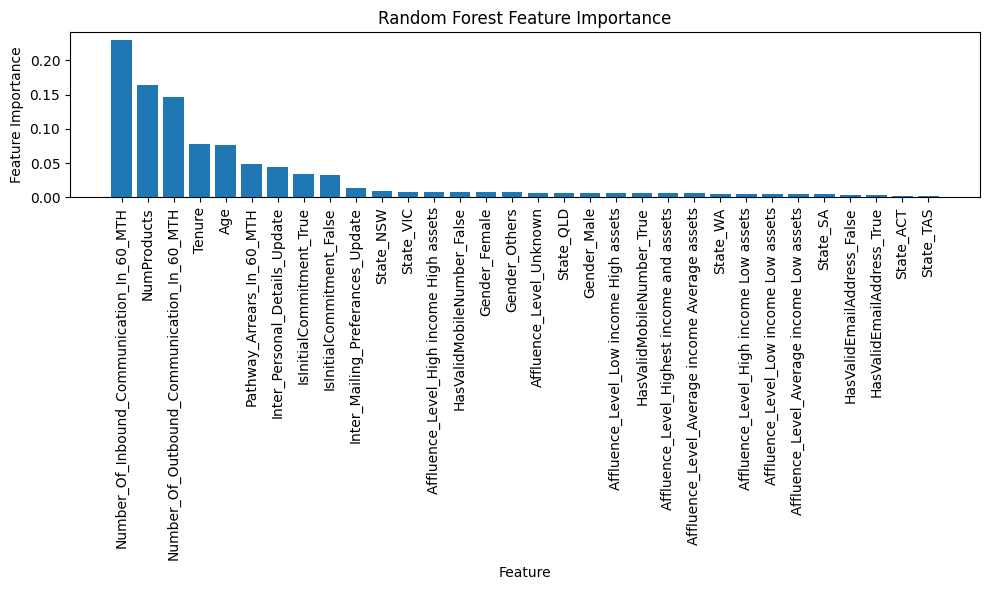

In [ ]:
feature_names = feature_cols #feature_names can run only for a list of column names

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df5 = pd.DataFrame()
df5['Revenue'] = df['Revenue']
df5['Is_Member'] = df['Is_Member']

df5['Revenue_group'] = pd.qcut(df5['Revenue'], q=25, precision=0,duplicates ='drop')
mean_Is_Member = df5.groupby(['Revenue_group'])['Is_Member'].mean()
# Rename the 'mean_Is_Member' Series
mean_Is_Member.name = 'Mean of Is_Member'

# Convert the Series to a DataFrame
mean_Is_Member_df = mean_Is_Member.reset_index()
# Sort the DataFrame by 'Mean_Is_Member' in descending order
mean_Is_Member_df_sorted = mean_Is_Member_df.sort_values(by='Mean of Is_Member', ascending=False)

# Display the sorted result
print(mean_Is_Member_df_sorted)



       Revenue_group  Mean of Is_Member
10  (3139.0, 5960.0]           0.980769
9   (2722.0, 3139.0]           0.976950
8   (1844.0, 2722.0]           0.975585
7    (900.0, 1844.0]           0.843872
6     (400.0, 900.0]           0.584637
5      (57.0, 400.0]           0.079403
4       (40.0, 57.0]           0.003498
3       (27.0, 40.0]           0.000821
2       (19.0, 27.0]           0.000756
0        (-1.0, 9.0]           0.000548
1        (9.0, 19.0]           0.000182


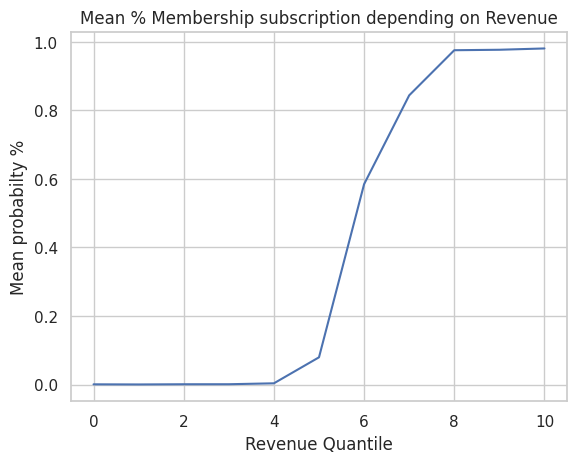

In [ ]:
df5['Revenue_quantile'] = pd.qcut(df5['Revenue'], q=25, labels=False, duplicates ='drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_member = df5.groupby(['Revenue_quantile'])['Is_Member'].mean()

#plot
plt.plot(mean_member.index, mean_member.values)
plt.title('Mean % Membership subscription depending on Revenue')
plt.xlabel('Revenue Quantile')
plt.ylabel('Mean probabilty %')
plt.show()

In [ ]:
df5 = pd.DataFrame()
df5['Number_Of_Inbound_Communication_In_60_MTH'] = df['Number_Of_Inbound_Communication_In_60_MTH']
df5['Is_Member'] = df['Is_Member']

df5['InboundCom_group'] = pd.qcut(df5['Number_Of_Inbound_Communication_In_60_MTH'], q=25, precision=0,duplicates ='drop')
mean_Is_Member = df5.groupby(['InboundCom_group'])['Is_Member'].mean()

# Rename the 'mean_Is_Member' Series
mean_Is_Member.name = 'Mean of Is_Member'

# Convert the Series to a DataFrame
mean_Is_Member_df = mean_Is_Member.reset_index()
# Sort the DataFrame by 'Mean_Is_Member' in descending order
mean_Is_Member_df_sorted = mean_Is_Member_df.sort_values(by='Mean of Is_Member', ascending=False)

# Display the sorted result
print(mean_Is_Member_df_sorted)

   InboundCom_group  Mean of Is_Member
2        (4.0, 6.0]           0.638379
1        (2.0, 4.0]           0.584962
3        (6.0, 8.0]           0.548611
4        (8.0, 9.0]           0.432990
5       (9.0, 11.0]           0.295148
6      (11.0, 13.0]           0.203829
7      (13.0, 14.0]           0.167213
0       (-1.0, 2.0]           0.150528
8      (14.0, 15.0]           0.141055
9      (15.0, 17.0]           0.114302
11     (18.0, 20.0]           0.096673
10     (17.0, 18.0]           0.090909
22    (48.0, 442.0]           0.058382
12     (20.0, 21.0]           0.055489
19     (31.0, 34.0]           0.047904
21     (39.0, 48.0]           0.047424
14     (23.0, 24.0]           0.046350
13     (21.0, 23.0]           0.044304
16     (26.0, 27.0]           0.032765
20     (34.0, 39.0]           0.029876
15     (24.0, 26.0]           0.028265
17     (27.0, 29.0]           0.026878
18     (29.0, 31.0]           0.023050


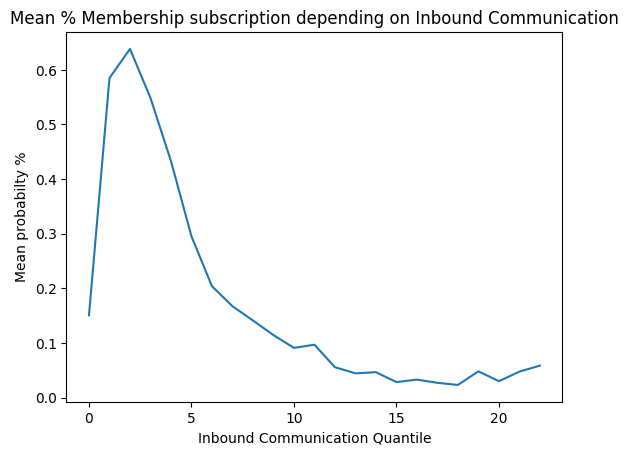

In [ ]:
df5['InboundCom_quantile'] = pd.qcut(df5['Number_Of_Inbound_Communication_In_60_MTH'], q=25, labels=False, duplicates ='drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_member = df5.groupby(['InboundCom_quantile'])['Is_Member'].mean()

#plot
plt.plot(mean_member.index, mean_member.values)
plt.title('Mean % Membership subscription depending on Inbound Communication')
plt.xlabel('Inbound Communication Quantile')
plt.ylabel('Mean probabilty %')
plt.show()

In [ ]:
df5 = pd.DataFrame()
df5['Number_Of_Outbound_Communication_In_60_MTH'] = df_new['Number_Of_Outbound_Communication_In_60_MTH']
df5['Is_Member'] = df_new['Is_Member']

df5['OutboundCom_group'] = pd.qcut(df5['Number_Of_Outbound_Communication_In_60_MTH'], q=25, precision=0,duplicates ='drop')
mean_Is_Member = df5.groupby(['OutboundCom_group'])['Is_Member'].mean()

# Rename the 'mean_Is_Member' Series
mean_Is_Member.name = 'Mean of Is_Member'

# Convert the Series to a DataFrame
mean_Is_Member_df = mean_Is_Member.reset_index()
# Sort the DataFrame by 'Mean_Is_Member' in descending order
mean_Is_Member_df_sorted = mean_Is_Member_df.sort_values(by='Mean of Is_Member', ascending=False)

# Display the sorted result
print(mean_Is_Member_df_sorted)

   OutboundCom_group  Mean of Is_Member
1       (11.0, 24.0]           0.456207
2       (24.0, 36.0]           0.427764
9     (100.0, 110.0]           0.327518
0       (-1.0, 11.0]           0.314785
8      (89.0, 100.0]           0.310744
3       (36.0, 47.0]           0.274832
7       (77.0, 89.0]           0.244961
10    (110.0, 121.0]           0.240000
4       (47.0, 56.0]           0.219595
6       (67.0, 77.0]           0.207297
5       (56.0, 67.0]           0.202932
11    (121.0, 131.0]           0.200163
12    (131.0, 141.0]           0.156131
13    (141.0, 150.0]           0.138462
15    (159.0, 167.0]           0.086139
14    (150.0, 159.0]           0.081405
16    (167.0, 174.0]           0.056270
17    (174.0, 181.0]           0.048760
24    (242.0, 359.0]           0.037721
18    (181.0, 188.0]           0.029173
20    (196.0, 204.0]           0.027341
22    (213.0, 224.0]           0.027005
19    (188.0, 196.0]           0.025836
23    (224.0, 242.0]           0.024525


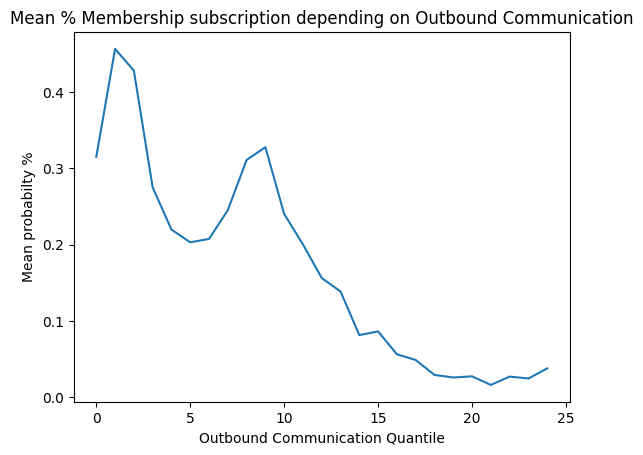

In [ ]:
df5['OutboundCom_quantile'] = pd.qcut(df5['Number_Of_Outbound_Communication_In_60_MTH'], q=25, labels=False, duplicates ='drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_member = df5.groupby(['OutboundCom_quantile'])['Is_Member'].mean()

#plot
plt.plot(mean_member.index, mean_member.values)
plt.title('Mean % Membership subscription depending on Outbound Communication')
plt.xlabel('Outbound Communication Quantile')
plt.ylabel('Mean probabilty %')
plt.show()

In [ ]:
df5 = pd.DataFrame()
df5['NumProducts'] = df['NumProducts']
df5['Is_Member'] = df['Is_Member']

df5['NumProducts_group'] = pd.qcut(df5['NumProducts'], q=4, precision=0,duplicates ='drop')
mean_Is_Member = df5.groupby(['NumProducts_group'])['Is_Member'].mean()

# Rename the 'mean_Is_Member' Series
mean_Is_Member.name = 'Mean of Is_Member'

# Convert the Series to a DataFrame
mean_Is_Member_df = mean_Is_Member.reset_index()
# Sort the DataFrame by 'Mean_Is_Member' in descending order
mean_Is_Member_df_sorted = mean_Is_Member_df.sort_values(by='Mean of Is_Member', ascending=False)

# Display the sorted result
print(mean_Is_Member_df_sorted)

  NumProducts_group  Mean of Is_Member
0        (0.0, 2.0]           0.221150
1        (2.0, 3.0]           0.074707
2        (3.0, 5.0]           0.055385


In [ ]:
df5 = pd.DataFrame()
df5['Tenure'] = df['Tenure']
df5['Is_Member'] = df['Is_Member']

df5['Tenure_group'] = pd.qcut(df5['Tenure'], q=4, precision=0,duplicates ='drop')
mean_Is_Member = df5.groupby(['Tenure_group'])['Is_Member'].mean()

# Rename the 'mean_Is_Member' Series
mean_Is_Member.name = 'Mean of Is_Member'

# Convert the Series to a DataFrame
mean_Is_Member_df = mean_Is_Member.reset_index()
# Sort the DataFrame by 'Mean_Is_Member' in descending order
mean_Is_Member_df_sorted = mean_Is_Member_df.sort_values(by='Mean of Is_Member', ascending=False)

# Display the sorted result
print(mean_Is_Member_df_sorted)

   Tenure_group  Mean of Is_Member
0   (-1.0, 7.0]           0.275833
2  (14.0, 20.0]           0.144334
1   (7.0, 14.0]           0.128175
3  (20.0, 49.0]           0.119851


In [ ]:
df5 = pd.DataFrame()
df5['Age'] = df_new['Age']
df5['Is_Member'] = df_new['Is_Member']

df5['Age_group'] = pd.qcut(df5['Age'], q=25, precision=0,duplicates ='drop')
mean_Is_Member = df5.groupby(['Age_group'])['Is_Member'].mean()

# Rename the 'mean_Is_Member' Series
mean_Is_Member.name = 'Mean of Is_Member'

# Convert the Series to a DataFrame
mean_Is_Member_df = mean_Is_Member.reset_index()
# Sort the DataFrame by 'Mean_Is_Member' in descending order
mean_Is_Member_df_sorted = mean_Is_Member_df.sort_values(by='Mean of Is_Member', ascending=False)

# Display the sorted result
print(mean_Is_Member_df_sorted)

       Age_group  Mean of Is_Member
0   (17.9, 25.0]           0.393431
1   (25.0, 31.0]           0.286872
2   (31.0, 36.0]           0.220246
5   (42.0, 44.0]           0.207692
10  (52.0, 52.3]           0.202797
6   (44.0, 46.0]           0.197400
8   (48.0, 50.0]           0.192943
7   (46.0, 48.0]           0.172897
3   (36.0, 39.0]           0.167254
11  (52.3, 54.0]           0.166791
9   (50.0, 52.0]           0.166667
4   (39.0, 42.0]           0.162791
12  (54.0, 56.0]           0.151213
16  (62.0, 64.0]           0.133510
13  (56.0, 58.0]           0.129563
14  (58.0, 60.0]           0.120456
15  (60.0, 62.0]           0.118431
17  (64.0, 66.0]           0.116458
19  (69.0, 72.0]           0.090056
18  (66.0, 69.0]           0.085337
20  (72.0, 77.0]           0.041738
21  (77.0, 90.0]           0.027375


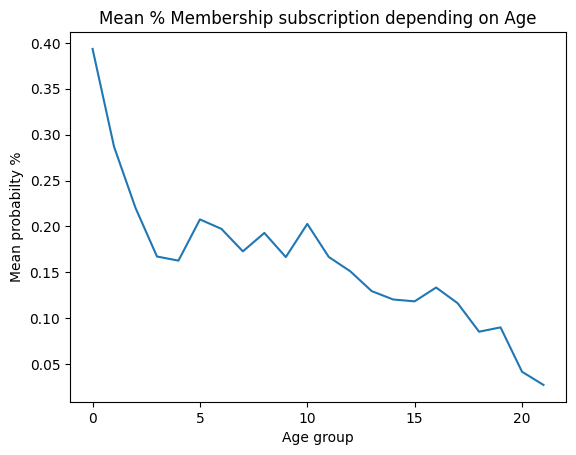

In [ ]:
df5['Age_group'] = pd.qcut(df5['Age'], q=25, labels=False, duplicates ='drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_member = df5.groupby(['Age_group'])['Is_Member'].mean()

#plot
plt.plot(mean_member.index, mean_member.values)
plt.title('Mean % Membership subscription depending on Age')
plt.xlabel('Age group')
plt.ylabel('Mean probabilty %')
plt.show()

In [ ]:
import xgboost as xgb


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split your data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train a Random Forest Classifier
xgb = xgb.XGBClassifier(random_state=2023)

xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = xgb.predict(X_valid)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_valid, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate Kappa
kappa = cohen_kappa_score(y_valid, y_pred)
print(f'Kappa: {kappa:.2f}')

# Calculate ROC AUC
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_valid, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate Recall
recall = recall_score(y_valid, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_valid, y_pred)
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.88
MAE: 0.12
Kappa: 0.67
ROC AUC: 0.82
Precision: 0.81
Recall: 0.68
F1 Score: 0.74


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_valid, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4793
           1       0.81      0.68      0.74      1630

    accuracy                           0.88      6423
   macro avg       0.86      0.82      0.83      6423
weighted avg       0.88      0.88      0.88      6423



Text(0.5, 1.0, 'Confusion Matrix')

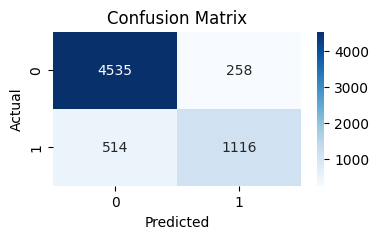

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')